<a href="https://colab.research.google.com/github/jiieunx/datacampus/blob/master/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%EC%97%AC%EB%9F%AC%EA%B0%9C_%EC%86%8D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터준비

In [ ]:
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import json

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


#트위터유저데이터, PRETRAINED W2V

In [ ]:
!curl gdrive.sh | bash -s 13fQZtkz4SSzVNcqh73SBqnUDw2mSDgzL
!curl gdrive.sh | bash -s 1W8u9ZuEhKCkTbaGLzUF4YcF2F_hYeE1B
!curl gdrive.sh | bash -s 1GffvAF3tBtSpjsblIdP1Tcv25XEyBewm
!curl gdrive.sh | bash -s 103jom7lxjiqQptIRjrIdSjXR8jRqrlEd

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2874  100  2874    0     0  18784      0 --:--:-- --:--:-- --:--:-- 18662
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    535      0 --:--:-- --:--:-- --:--:--   536
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Refusing to overwrite twitter_users.tsv: File exists
100  1377    0  1377    0     0   1412      0 --:--:-- --:--:-- --:--:-- 36236
curl: (23) Failed writing body (0 != 1377)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2874  100  2874    0     0  20239      0 --:--:-- --:--:-- --:--:-- 20239
  % Total    % Received % X

#data load

In [ ]:
df = pd.read_excel('data2_5.xlsx')
df.head(3)

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1
0,100020070001,M0vQhLryshtSgdzJk9KWew==,20140325,50,상기자는 주소지에 거주하면서 가정환경에 잘 적응하고 있어 보호상 문제는 없어 보임. 승일기업 도장공으로 계속 근무하면서 자립대책 마련을 위해 성실히 저축하고 있는 등 건전한 사회복귀를 위해 성실히 노력중에 있음.,0,0,1959,50,1,20,50
1,100020070001,M0vQhLryshtSgdzJk9KWew==,20130109,20,"계사년 새해를 맞아 저축을 통한 자립에 힘써 줄 것과 준법심을 고취하여 건전한 사회복귀, 동절기 건강관리 유의하여 취업활동에 지장을 초래하지 않도록 하며, 직장 동료들과 원만한 대인관계 유지 등 취업전반에 대해 지도 함.\r\n",0,0,1959,50,1,20,110
2,100020070001,M0vQhLryshtSgdzJk9KWew==,20140227,50,"상기자는 승일기업 도장공으로 근무하면서 자립을 위해 성실히 저축에 임하고 있어 보호상 문제는 없어 보이며, 근무 중 안전사고를 사전에 예방하기 위해 안전수칙을 잘 준수해 줄 것과 동료간 원만한 대인관계를 유지해 줄 것을 지도 함.",0,0,1959,50,1,20,50


In [ ]:
df = df[df['CARE_OPEN_CLASS_NM']==10]
df.head(3)

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1
460,100020100078,x4IdPpcY90s/iD0RH7wykQ==,20160927,10,대상자가 기술교육원 야간반 과정에 참여하고자 함에 따라 수료시까지 성실히 교육에 임해줄 것과 출결관리에 신경써 줄 것을 지도함,0,1,1982,30,1,40,10
1103,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130419,10,귀소여부에 대해 물어보았으며 금주는 귀소하여 쉬다가 출근할 계획이라고 하여 안전사고에 각별히 주의 할 것을 당부함,0,1,1986,20,1,20,10
1105,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130620,10,최근 상황에 대해 청취하고 귀소여부에 대해 물어보았으며 향후 기간만료가 다가오고 있으니 생활할 곳을 알아보고 다닐것을 당부함,0,1,1986,20,1,20,10


In [ ]:
len(df)

93390

In [ ]:
from gensim.models import Word2Vec

In [ ]:

# w2v모델 불러오기 
model = Word2Vec.load('embedding.save')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


#KoNLPy 설치 

In [ ]:
!pip install -q konlpy

#Mecab 설치

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


# Mecab으로 상담 내용에서 명사만 추출 

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
mecab.morphs('안녕하세요 반가워요'), mecab.morphs('나는 대한민국을 너무 좋아하고 사랑하는 국민이다.	')

(['안녕', '하', '세요', '반가워요'],
 ['나',
  '는',
  '대한민국',
  '을',
  '너무',
  '좋',
  '아',
  '하',
  '고',
  '사랑',
  '하',
  '는',
  '국민',
  '이',
  '다',
  '.'])

In [ ]:
#명사, 두글자이상 추출
def get_tokens(x):
    try:
        return [i for i in mecab.nouns(x) if len(i) > 1] if x else []
    except Exception as e:
        if str(x) == 'nan':
            return []
        print(e)
        print(str(x))
        raise e

In [ ]:
df['user_mecab'] = df['CONSULT_CONT'].map(get_tokens)
df['user_mecab_len'] = df['user_mecab'].map(len)

In [ ]:
df.head(3)

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1,user_mecab,user_mecab_len
460,100020100078,x4IdPpcY90s/iD0RH7wykQ==,20160927,10,대상자가 기술교육원 야간반 과정에 참여하고자 함에 따라 수료시까지 성실히 교육에 임해줄 것과 출결관리에 신경써 줄 것을 지도함,0,1,1982,30,1,40,10,"[대상자, 기술, 교육, 야간, 과정, 참여, 수료, 교육, 출결, 관리, 신경, 지도]",12
1103,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130419,10,귀소여부에 대해 물어보았으며 금주는 귀소하여 쉬다가 출근할 계획이라고 하여 안전사고에 각별히 주의 할 것을 당부함,0,1,1986,20,1,20,10,"[귀소, 여부, 금주, 귀소, 출근, 계획, 안전, 사고, 주의, 당부]",10
1105,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130620,10,최근 상황에 대해 청취하고 귀소여부에 대해 물어보았으며 향후 기간만료가 다가오고 있으니 생활할 곳을 알아보고 다닐것을 당부함,0,1,1986,20,1,20,10,"[최근, 상황, 청취, 귀소, 여부, 향후, 기간, 만료, 생활, 당부]",10


# 명사수 5개 이상인 유저만 추출 

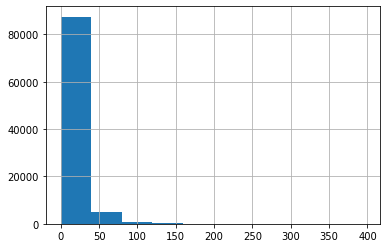

In [ ]:
#명사 5개이상 추출 
df['user_mecab_len'].hist()

In [ ]:
bio_exists_df = df[df['user_mecab_len'] >= 25]

In [ ]:
len(bio_exists_df)

21191

In [ ]:
bio_exists_df.sample(3)

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1,user_mecab,user_mecab_len
112719,122020190176,9BtMRDmSWeIbAuSPcDauGA==,20191215,10,"2019.12.15 18:50경 생활관 내에서 금일 입소한 차유정이 계속 쳐다 본다는 이유로 대상자가 ""겁나 꼬라보네"" 하고 201호로 들어가자 차유정이 ""니 방금한말 나 한테 한거냐""고 하며 시비가 되어 서로 머리채를 잡고 발길질을 하는 등 몸싸움을 하여 싸움을 발견한 당직 근무자가 싸움을 제지하며 그만 둘 것을 지시하였으나 지시에 따르지 않고 머리채를 잡고 계속 싸웠으며 먼저 대상자가 머리채를 놓았으나 차유정이 계속 머리채를 잡고 발길질하여 당직근무자가 두 대상자의 가운데서 완력으로 엉겨붙은 두 사람을 떼어 놓아 싸움이 그쳤으며 대상자과 분리하여 먼저 차유정과 조혜원를 사무실로 동행, 싸움에 대한 자술서를 징구하고 사건 경위를 청취한 후 생활관에 두 사람을 대기시키고 대상자와 목격자인 정채연,박민서도 사무실로 동행 자술서 징구 및 사건 경위를 청취 후 정채연과 박민선은 생활관으로 올려 보내고 대상자와 싸움의 자세한 경위 등을 면담을 하고 있는 도중 생활관에 올라 갔던 정채연으로 부터 신입 대상자 두 명이 보이지 않는다는 보고를 받고 생활관으로 올라가 확인한 바, 신입 대상자의 소지품이 없어 생활관 주변 등을 찾아보았으나 보이지 않아 신입 대상자들이 무단외출 했음을 확인하였음.",0,1,2002,10,1,80,10,"[생활관, 금일, 입소, 차유정, 이유, 대상자, 차유정, 시비, 머리채, 발길, 몸싸움, 싸움, 발견, 당직, 근무자, 싸움, 제지, 지시, 지시, 머리채, 대상자, 머리채, 차유정, 머리채, 발길, 당직, 근무자, 대상자, 가운데, 완력, 사람, 싸움, 대상, 자과, 분리, 차유정, 조혜원, 사무실, 동행, 싸움, 자술서, 징구, 사건, 경위, 청취, 생활관, 사람, 대기, 대상자, 목격자, 정채, 박민서, 사무실, 동행, 자술서, 징구, 사건, 경위, 청취, 정채, 연과, 박민선, 생활관, 대상자, 싸움, 경위, 면담, 도중, 생활관, 정채, 신입, 대상자, 보고, 생활관, 확인, 신입, 대상자, 소지품, 생활관, 주변, 신입, 대상자, 무단, 확인]",84
244159,80020180511,0Ki0GdoIj5300oEBJiTPlQ==,20190830,10,"정재영 Ct와 금일 생활상담을 실시한 결과, Ct는 현재까지 전기기능사 자격증 취득을 위한 기술학원에 수강중이라고 하였으며, 틈틈이 보험설계영업일을 하면서 생활비를 마련하고 있다고 하였음. Ct가 학원수강으로 인해 평소 귀소시간이 늦은관계로 생활관리 철저를 당부하고 금일 상담을 종결하였음.",0,1,1982,30,1,40,10,"[정재영, 금일, 생활, 상담, 실시, 결과, 현재, 전기, 기능사, 자격증, 취득, 기술, 학원, 수강, 보험, 설계, 영업, 생활비, 마련, 학원, 수강, 평소, 귀소, 시간, 관계, 생활, 관리, 철저, 당부, 금일, 상담, 종결]",32
112459,122020190112,Is2XAsjNtuenoAUva0zxQA==,20190924,10,"- 9/23 23시 취침이후 야간점검 중 0시20분경 김하늬가 본인 방에 없고, 이하은 방문에서 불빛이 세어나오며 걸어잠근 사실을 확인함.\r\n- 문을 열라고 종용하였으나 방안에서 이하은과 김하늬가 분주하게 움직이며 물건을 치우고 수습하는 소리를 들음. 재차 방문을 열라고 지시하였으나 한참후에 문을 열음. 두 사람 모두 진한 화장을 한 차림으로 바닥에는 화장품과 해어도구들이 정신없이 흩어져 있음.\r\n- 야간취침시간대 창문을 제외하고, 모든 방문을 걸어잠그지 말도록 이하은에게 여러번 주의를 주었음에도 또 방문을 걸어잠근 사실과 취침시간대 이후 취침하지 않고 있는 부분, 방문을 열도록 여러번 지시하였으나 지도에 한참동안 불응한 부분에 대해 훈계하고, 익일 이후 반성문을 작성하도록 지도함.\r\n- 01시40분경 야간시간 점검중 이하은과 김하늬 모두 취침중임을 확인함.\r\n- 03시경 외부에서 딸깔하는 소리를 확인 후 방을 점검한 결과 둘다 자리에 없음을 확인하고, 화장실과 흡연실 옥상 점검결과 외부로 무단이탈하였음을 확인함.\r\n- 05시, 06시경 몰래 들어왔는지 점검하였으나 아직 귀소하지 않음.\r\n- 07시20분경 대문앞 택시에서 내리는 이하은과 김하늬를 발견, 김하늬가 대문 사이로 손을 집어넣어 문을 열고 몰래 들어오는 모습을 포착하고 둘다 사무실로 들어와 경위를 조사함.\r\n- 둘다 5시30분경 편의점을 다녀왔을 뿐이라며 거짓말을 함. 김하늬를 사무실로 따로 불러 사실을 종용한 결과 02시 경 이하은과 몰래 이탈하여 택시를 타고 이하은 목포친구를 만나 노래방을 가서 소주와 맥주 등 3병을 나눠마시고 놀다 들어왔다고 진술함.\r\n- 둘다에게 사실대로 경위서를 작성해서 제출토록 하였는데 김하늬만 사실대로 쓰고 이하은은 계속해서 배가고파 새벽 5시반경 나가 편의점을 다녀왔을 뿐이라며 거짓말을 함.\r\n- 김하늬를 생활관으로 올려보내고 사실대로 쓸때까지 경위서를 다시 쓰도록 지도하니 욕설과 안하무인 행동을 일삼으며 자신의 핸드폰을 당장 내놓으라고 바로 가출하겠다며 직원을 위협함. 사무실까지 난입하여 사무실밖으로 나가 거실에서 대기하라는 직원의 말을 무시하며 계속해서 욕설과 함께 소리를 지르며 폭주함.\r\n- 폭주하며 소리를 지르고 거친 행동을 일삼는 이하은을 겨우 진정시키고 상담을 진행함. 직원이 새벽 2시 이후부터 점검한 시간대를 설명하고, 김하늬가 진실대로 이야기 한 부분을 짚어주며 자신이 거짓말을 하고 있음을 확인시켜주니 그때부터 갑자기 태도를 봐꾸며 잘못했다고 시인함. 거짓말이면서 계속해서 새벽5시반에 편의점을 갔다온거처럼 거짓말을 한것인지 물으니 답변하지 않음 .\r\n- 보호관찰 준수사항으로 야간외출이 제한되어 있으면서 무단으로 이탈한점, 음주한 점, 귀소후 반성치 않고 거짓말을 반복하며 직원에게 폭언과 위협을 가한 점에 대해 훈계하고 숙식담당직원에게 인계함.",0,0,2003,10,1,40,10,"[취침, 이후, 야간, 점검, 분경, 김하늬, 본인, 이하은, 방문, 불빛, 사실, 확인, 종용, 이하은, 김하늬, 분주, 물건, 수습, 소리, 방문, 지시, 한참, 사람, 화장, 차림, 바닥, 화장품, 해어, 도구, 야간, 취침, 시간, 창문, 제외, 방문, 이하은, 주의, 방문, 사실, 취침, 시간, 이후, 취침, 부분, 방문, 지시, 지도, 한참, 동안, 불응, 부분, 훈계, 익일, 이후, 반성문, 작성, 지도, 분경, 야간, 시간, 점검, 이하은, 김하늬, 취침, 중임, 확인, 외부, 소리, 확인, 점검, 결과, 자리, 확인, 화장실, 흡연실, 옥상, 검결, 외부, 무단이탈, 확인, 점검, 귀소, 분경, 대문, 택시, 이하은, 김하늬, 발견, 김하늬, 대문, 사이, 모습, 포착, 사무실, 경위, 조사, 분경, 편의점, 거짓말, 김하늬, ...]",200


#유저의 벡터 = 각명사들 벡터의 MEAN 

In [ ]:
#문맥이해하는 더 좋은 방법 적용 
def get_sentence_mean_vector(morphs):
    vector = []
    for i in morphs:
        try:
            vector.append(model.wv[i])
        except KeyError as e:
            pass
    try:
        return np.mean(vector, axis=0)
    except IndexError as e:
        pass

In [ ]:

bio_exists_df['wv'] = bio_exists_df['user_mecab'].map(get_sentence_mean_vector)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bio_exists_df['wv']

2583      [0.022427034, 0.20771548, 0.15720652, 0.041360263, -0.2586705, -0.049667887, 0.15541458, 0.0008102008, 0.018608604, 0.1271001, -0.023626462, -0.21867129, 0.10545426, -0.010349628, -0.0005828898, -0.08517236, -0.07292266, -0.09192299, 0.16128847, -0.08617859, 0.08614653, 0.1997228, 0.018213466, -0.0029917315, 0.111996286, -0.013965525, 0.03408659, -0.24751055, 0.037857603, -0.11053614, 0.0707694, 0.11527688, 0.032823477, -0.036801506, -0.07037376, -0.07503013, 0.18551004, 0.11486343, -0.019247122, -0.15579675, -0.011566204, -0.06820336, 0.14685856, 0.14364074, -0.2498748, 0.017659435, -0.12734531, -0.24599133, 0.23310846, -0.113730274, 0.07487614, -0.046728, 0.07864619, -0.22571386, 0.21350747, 0.086509466, -0.052435018, -0.04727672, -0.057193194, -0.041738868, 0.009822437, 0.17759638, 0.05228128, -0.15126926, 0.03204389, -0.15385017, -0.11346399, -0.15373087, 0.035629187, -0.010854018, -0.008044587, -0.04176231, 0.066286154, 0.10626233, 0.15844719, 0.08412814, -0.01572698, 0.

#각벡터 300차원

In [ ]:
len(bio_exists_df.dropna().head(1)['wv'].to_list()[0])

300

In [ ]:
bio_exists_df.dropna().head(1)['wv'].to_list()[0]

array([ 2.24270336e-02,  2.07715482e-01,  1.57206520e-01,  4.13602628e-02,
       -2.58670509e-01, -4.96678874e-02,  1.55414581e-01,  8.10200814e-04,
        1.86086036e-02,  1.27100095e-01, -2.36264616e-02, -2.18671292e-01,
        1.05454259e-01, -1.03496276e-02, -5.82889828e-04, -8.51723626e-02,
       -7.29226619e-02, -9.19229910e-02,  1.61288470e-01, -8.61785933e-02,
        8.61465335e-02,  1.99722797e-01,  1.82134658e-02, -2.99173151e-03,
        1.11996286e-01, -1.39655247e-02,  3.40865888e-02, -2.47510552e-01,
        3.78576033e-02, -1.10536143e-01,  7.07693994e-02,  1.15276881e-01,
        3.28234769e-02, -3.68015058e-02, -7.03737587e-02, -7.50301331e-02,
        1.85510039e-01,  1.14863433e-01, -1.92471221e-02, -1.55796751e-01,
       -1.15662040e-02, -6.82033598e-02,  1.46858558e-01,  1.43640742e-01,
       -2.49874800e-01,  1.76594350e-02, -1.27345309e-01, -2.45991334e-01,
        2.33108461e-01, -1.13730274e-01,  7.48761371e-02, -4.67280000e-02,
        7.86461905e-02, -

In [ ]:
bio_exists_df.head(1)

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1,user_mecab,user_mecab_len,wv,category
2583,100020120288,4ITuomhVxxwhUfg9Hxg/6A==,20130828,10,숙식제공 연장과 관련하여 면담을 실시하였으며 현재 저축실적이 없고 성실하지 못한 태도로 생활해 왔던 점을 지적하고 연장이 어려울 것같다고 알려주었으며 본인이 나가는 현장에서 제공하는 숙소에서 생활하겠다며 퇴소를 희망하여 성실히 노력해 자립할 수 있도록 노력해 줄것을 당부하고 보호종료 처리함,0,0,1979,30,1,40,10,"[숙식, 제공, 연장, 관련, 면담, 실시, 저축, 실적, 성실, 태도, 생활, 지적, 연장, 본인, 현장, 제공, 숙소, 생활, 퇴소, 희망, 노력, 자립, 노력, 당부, 보호, 종료, 처리]",27,"[0.022427034, 0.20771548, 0.15720652, 0.041360263, -0.2586705, -0.049667887, 0.15541458, 0.0008102008, 0.018608604, 0.1271001, -0.023626462, -0.21867129, 0.10545426, -0.010349628, -0.0005828898, -0.08517236, -0.07292266, -0.09192299, 0.16128847, -0.08617859, 0.08614653, 0.1997228, 0.018213466, -0.0029917315, 0.111996286, -0.013965525, 0.03408659, -0.24751055, 0.037857603, -0.11053614, 0.0707694, 0.11527688, 0.032823477, -0.036801506, -0.07037376, -0.07503013, 0.18551004, 0.11486343, -0.019247122, -0.15579675, -0.011566204, -0.06820336, 0.14685856, 0.14364074, -0.2498748, 0.017659435, -0.12734531, -0.24599133, 0.23310846, -0.113730274, 0.07487614, -0.046728, 0.07864619, -0.22571386, 0.21350747, 0.086509466, -0.052435018, -0.04727672, -0.057193194, -0.041738868, 0.009822437, 0.17759638, 0.05228128, -0.15126926, 0.03204389, -0.15385017, -0.11346399, -0.15373087, 0.035629187, -0.010854018, -0.008044587, -0.04176231, 0.066286154, 0.10626233, 0.15844719, 0.08412814, -0.01572698, 0.041869313, -0.019369218, 0.0777311, -0.10025058, -0.011132741, -0.0289444, -0.15027015, 0.14524275, 0.05637732, -0.035015795, 0.16119067, 0.088129014, 0.008788134, 0.10065247, -0.11232715, -0.05042138, 0.046035673, -0.14953803, 0.0035652716, 0.013114619, 0.100665204, -0.24380256, -0.14170904, ...]",1


In [ ]:
newdata=bio_exists_df[['CONSULT_CONT','user_mecab','wv','category']]

In [ ]:
newdata

,CONSULT_CONT,user_mecab,wv,category
2583,숙식제공 연장과 관련하여 면담을 실시하였으며 현재 저축실적이 없고 성실하지 못한 태도로 생활해 왔던 점을 지적하고 연장이 어려울 것같다고 알려주었으며 본인이 나가는 현장에서 제공하는 숙소에서 생활하겠다며 퇴소를 희망하여 성실히 노력해 자립할 수 있도록 노력해 줄것을 당부하고 보호종료 처리함,"[숙식, 제공, 연장, 관련, 면담, 실시, 저축, 실적, 성실, 태도, 생활, 지적, 연장, 본인, 현장, 제공, 숙소, 생활, 퇴소, 희망, 노력, 자립, 노력, 당부, 보호, 종료, 처리]","[0.022427034, 0.20771548, 0.15720652, 0.041360263, -0.2586705, -0.049667887, 0.15541458, 0.0008102008, 0.018608604, 0.1271001, -0.023626462, -0.21867129, 0.10545426, -0.010349628, -0.0005828898, -0.08517236, -0.07292266, -0.09192299, 0.16128847, -0.08617859, 0.08614653, 0.1997228, 0.018213466, -0.0029917315, 0.111996286, -0.013965525, 0.03408659, -0.24751055, 0.037857603, -0.11053614, 0.0707694, 0.11527688, 0.032823477, -0.036801506, -0.07037376, -0.07503013, 0.18551004, 0.11486343, -0.019247122, -0.15579675, -0.011566204, -0.06820336, 0.14685856, 0.14364074, -0.2498748, 0.017659435, -0.12734531, -0.24599133, 0.23310846, -0.113730274, 0.07487614, -0.046728, 0.07864619, -0.22571386, 0.21350747, 0.086509466, -0.052435018, -0.04727672, -0.057193194, -0.041738868, 0.009822437, 0.17759638, 0.05228128, -0.15126926, 0.03204389, -0.15385017, -0.11346399, -0.15373087, 0.035629187, -0.010854018, -0.008044587, -0.04176231, 0.066286154, 0.10626233, 0.15844719, 0.08412814, -0.01572698, 0.041869313, -0.019369218, 0.0777311, -0.10025058, -0.011132741, -0.0289444, -0.15027015, 0.14524275, 0.05637732, -0.035015795, 0.16119067, 0.088129014, 0.008788134, 0.10065247, -0.11232715, -0.05042138, 0.046035673, -0.14953803, 0.0035652716, 0.013114619, 0.100665204, -0.24380256, -0.14170904, ...]",1
2637,상기자는 그간 취업성공패키지에 참여하여 일을 해오다 숙식기간이 만료가 되어 퇴소를 하게되었으며 평소 성실하지 못한 생활태도를 반드시 개선하고 열심히 취업활동을 하여 자립할 수 있도록 노력해 줄것을 당부하고 취업알선 보호전환 종료함,"[상기, 그간, 취업, 성공, 패키지, 참여, 숙식, 기간, 만료, 퇴소, 평소, 성실, 생활, 태도, 개선, 취업, 활동, 자립, 노력, 당부, 취업, 알선, 보호, 전환, 종료]","[0.0024143592, 0.22359283, 0.23931776, -0.009176803, -0.1724028, -0.083909586, 0.1681236, -0.063299514, 0.0022536581, 0.10028522, -0.061160978, -0.26443684, 0.1035318, -0.0053499066, -0.08260588, -0.06697911, -0.15039046, -0.08976439, 0.16005832, -0.043520432, 0.055920128, 0.19715787, 0.015458684, -0.08049787, 0.13672799, 0.03363407, 0.1086228, -0.25755742, -0.0047695427, -0.16981412, 0.0035845698, 0.16977301, 0.021523194, -0.034833618, 0.018917833, -0.15472627, 0.2378537, 0.12229541, -0.028515767, -0.10188825, 0.011147623, -0.007516608, 0.12794548, 0.1338913, -0.18557578, -0.00695003, -0.13810477, -0.21401376, 0.2947855, -0.14790349, 0.04717244, -0.041193433, 0.08038572, -0.14352846, 0.25293458, 0.062639534, 0.056940798, 0.0056231664, -0.099885665, -0.10206846, 0.011044491, 0.12550586, 0.01897038, -0.0954658, 0.020290684, -0.19155909, -0.14847237, -0.13973011, 0.021392789, -0.05533848, -0.034090385, -0.056887127, 0.070846885, 0.18100236, 0.13492021, 0.10983113, -0.01194415, 0.0033753673, -0.011688378, 0.093306266, -0.062177517, 0.04379096, -0.061857775, -0.19817796, 0.123153985, 0.12517229, -0.05018671, 0.12057526, 0.04936708, -0.046084672, 0.19931737, -0.097214945, -0.102353685, 0.06863962, -0.108220235, 0.02734404, -0.033453, 0.08155671, -0.15385462, -0.14619125, ...]",1
2754,상기인은 허그일자리지원 담당자와 함께 금호하이테크에 동행면접을 보고 7월 3일 부터 취업하고자 하였으나 심경의 변화가 생겨 다른 회사에 이력서를 넣고자 하여 이력서 클리닉 실시함. 대상자에게 금호하이테크에 연락하여 입사하지 않음을 고지하고 마무리를 지으라고 조언함. 그리고 대상자가 취업에 성공할것이라는 자신감을 심어줌.,"[기인, 허그, 일자리, 지원, 담당자, 금호, 하이테크, 동행, 면접, 취업, 심경, 변화, 회사, 이력서, 이력서, 클리닉, 실시, 대상자, 금호, 하이테크, 연락, 입사, 고지, 마무리, 조언, 대상자, 취업, 성공, 자신감]","[0.035521317, 0.11344594, 0.20214505, 0.030586706, -0.18599339, 0.0023682078, 0.15518484, -0.088988446, -0.0104938755, 0.045920946, -0.027077213, -0.18725951, 0.15366842, -0.03896866, -0.021850925, -0.13101338, -0.10214641, -0.06529482, 0.17001376, -0.0628186, 0.0033504146, 0.17959574, 0.1745243, -0.037275847, -0.0066113085, -0.099213734, -0.032222137, -0.224235, -0.023048347, -0.1622159, 0.030492632, 0.05025616, 0.054242965, -0.037106544, 0.01056069, -0.06961764, 0.24684761, 0.05160781, -0.105255954, -0.039963923, 0.092465244, -0.06

In [ ]:
import numpy as np


x = newdata['wv']
y = newdata['category']

print(x.shape, y.shape)

(21191,) (21191,)


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 - 6:2:2 비율
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(12714,) (4238,) (4239,)


In [ ]:
from sklearn.svm import SVC

In [ ]:
list_x_train=x_train.tolist()

In [ ]:
# linear SVM 학습하기
linear_svm = SVC(kernel='linear')
linear_svm.fit(list_x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# linear SVM accuracy 계산하기
from sklearn.metrics import accuracy_score, confusion_matrix
list_x_val=x_val.tolist()
pred_val = linear_svm.predict(list_x_val)
print(f"accuracy:{accuracy_score(y_val, pred_val)}")

accuracy:0.9660217083529967


In [ ]:
# 여러 가지 kernel을 사용해 SVM 학습하고 accuracy 계산하기
kernels = ['poly','rbf','sigmoid']

for kernel in kernels:
    print("==========================================") 
    model = SVC(kernel = kernel)
    model.fit(list_x_train, y_train)
    pred_val = model.predict(list_x_val)
    print(f"accuracy of {kernel}: {accuracy_score(y_val, pred_val)}")


accuracy of poly: 0.9650778669183577
accuracy of rbf: 0.9664936290703162
accuracy of sigmoid: 0.9613025011798018


In [ ]:
# 가장 좋다고 판단되는 SVM 모델로 test data 정확도 확인하기
rbf_svm = SVC(kernel = 'rbf')
rbf_svm.fit(list_x_train, y_train)
list_x_test= x_test.tolist()
pred_test = rbf_svm.predict(list_x_test)

print(f'test accuracy of rbf SVM: {accuracy_score(y_test, pred_test)}')


test accuracy of rbf SVM: 0.9648502005189903


In [ ]:
from gensim.models import Word2Vec

In [ ]:

# w2v모델 불러오기 
model = Word2Vec.load('embedding.save')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
mecab = Mecab()
ex= '''
지인의 집에서 짐을 챙기고 들어옴
기초생활비 집행이 되었음을 알리고 교통비등으로 사용할것을 안내함
생활관 입소목표에 대하여 물으니 운전면허를 이용한 취업 예를 들어 요양병원 환자 이송 운전원,농산물 시장 운전등을 이야기 하여 허그일자리를 연계함
대상자는 사고로 인해서 한쪽 눈과 귀가 불능이라고 하였지만 운전면허 적성검사를 합격하여 2027년까지 운전이 가능하다함.
'''

ex = get_tokens(ex)
vector = get_sentence_mean_vector(ex)
len(vector)

AttributeError: ignored

In [ ]:
#테스트
ex= '''
지인의 집에서 짐을 챙기고 들어옴
기초생활비 집행이 되었음을 알리고 교통비등으로 사용할것을 안내함
생활관 입소목표에 대하여 물으니 운전면허를 이용한 취업 예를 들어 요양병원 환자 이송 운전원,농산물 시장 운전등을 이야기 하여 허그일자리를 연계함
대상자는 사고로 인해서 한쪽 눈과 귀가 불능이라고 하였지만 운전면허 적성검사를 합격하여 2027년까지 운전이 가능하다함.
'''


#명사로 바꾸고 워드투백 적용 트위터에서 했던거 다적ㅇ용
#아웃풋은 벡터 그값이 테스트 

In [ ]:
# 각 조합에 대해 SVM 학습하고 accuracy 계산하기
C = [1, 10, 100, 1000]
Gamma = [0.00001, 0.0001, 0.001, 0.01]

for c in C:
    for gamma in Gamma:
        print("======================================")
        model = SVC(kernel = 'rbf', C=c, gamma=gamma)
        model.fit(list_x_train, y_train)
        pred_val = model.predict(list_x_val)
        print(f"accuracy of C={c}, gamma={gamma}: {accuracy_score(y_val, pred_val)}")
        

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV에서 cross validation을 하므로, validation data가 필요없음
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# 아래와 같이 탐색할 조합들을 지정
param_grid = {'C': [1, 10, 100, 1000,10000], 
              'gamma': [0.00001,0.00001, 0.0001, 0.001, 0.01]}

In [ ]:
# GridSearchCV를 이용하여 분류하기
svm_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=4, scoring='accuracy')
list_x_train = x_train.tolist()
svm_grid.fit(list_x_train, y_train)

In [ ]:
# 최적의 조합과 그 때의 점수 알아보기
print(svm_grid.best_params_)
print(svm_grid.best_score_)

In [ ]:
# test data에 대한 정확도 계산하기
pred_test2 = svm_grid.best_estimator_.predict(x_test)
print(f'test accuracy of rbf SVM grid: {accuracy_score(y_test, pred_test2)}')

#빈것 제거 

In [ ]:
bio_exists_df = bio_exists_df.dropna()
#bio_exists_df = bio_exists_df.drop_duplicates('user.id')

In [ ]:
len(bio_exists_df)

21191

#KMEANS

In [ ]:
bio_exists_df.head(1)

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1,user_mecab,user_mecab_len,wv
2583,100020120288,4ITuomhVxxwhUfg9Hxg/6A==,20130828,10,숙식제공 연장과 관련하여 면담을 실시하였으며 현재 저축실적이 없고 성실하지 못한 태도로 생활해 왔던 점을 지적하고 연장이 어려울 것같다고 알려주었으며 본인이 나가는 현장에서 제공하는 숙소에서 생활하겠다며 퇴소를 희망하여 성실히 노력해 자립할 수 있도록 노력해 줄것을 당부하고 보호종료 처리함,0,0,1979,30,1,40,10,"[숙식, 제공, 연장, 관련, 면담, 실시, 저축, 실적, 성실, 태도, 생활, 지적, 연장, 본인, 현장, 제공, 숙소, 생활, 퇴소, 희망, 노력, 자립, 노력, 당부, 보호, 종료, 처리]",27,"[0.022427034, 0.20771548, 0.15720652, 0.041360263, -0.2586705, -0.049667887, 0.15541458, 0.0008102008, 0.018608604, 0.1271001, -0.023626462, -0.21867129, 0.10545426, -0.010349628, -0.0005828898, -0.08517236, -0.07292266, -0.09192299, 0.16128847, -0.08617859, 0.08614653, 0.1997228, 0.018213466, -0.0029917315, 0.111996286, -0.013965525, 0.03408659, -0.24751055, 0.037857603, -0.11053614, 0.0707694, 0.11527688, 0.032823477, -0.036801506, -0.07037376, -0.07503013, 0.18551004, 0.11486343, -0.019247122, -0.15579675, -0.011566204, -0.06820336, 0.14685856, 0.14364074, -0.2498748, 0.017659435, -0.12734531, -0.24599133, 0.23310846, -0.113730274, 0.07487614, -0.046728, 0.07864619, -0.22571386, 0.21350747, 0.086509466, -0.052435018, -0.04727672, -0.057193194, -0.041738868, 0.009822437, 0.17759638, 0.05228128, -0.15126926, 0.03204389, -0.15385017, -0.11346399, -0.15373087, 0.035629187, -0.010854018, -0.008044587, -0.04176231, 0.066286154, 0.10626233, 0.15844719, 0.08412814, -0.01572698, 0.041869313, -0.019369218, 0.0777311, -0.10025058, -0.011132741, -0.0289444, -0.15027015, 0.14524275, 0.05637732, -0.035015795, 0.16119067, 0.088129014, 0.008788134, 0.10065247, -0.11232715, -0.05042138, 0.046035673, -0.14953803, 0.0035652716, 0.013114619, 0.100665204, -0.24380256, -0.14170904, ...]"


In [ ]:
from sklearn.cluster import KMeans
import time

In [ ]:
feature= bio_exists_df[ ['JAEBUM','JAEBUM_1','출생년도','연령','학력','죄명','wv']]
feature.head()

,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,wv
2583,0,0,1979,30,1,40,"[0.022427034, 0.20771548, 0.15720652, 0.041360263, -0.2586705, -0.049667887, 0.15541458, 0.0008102008, 0.018608604, 0.1271001, -0.023626462, -0.21867129, 0.10545426, -0.010349628, -0.0005828898, -0.08517236, -0.07292266, -0.09192299, 0.16128847, -0.08617859, 0.08614653, 0.1997228, 0.018213466, -0.0029917315, 0.111996286, -0.013965525, 0.03408659, -0.24751055, 0.037857603, -0.11053614, 0.0707694, 0.11527688, 0.032823477, -0.036801506, -0.07037376, -0.07503013, 0.18551004, 0.11486343, -0.019247122, -0.15579675, -0.011566204, -0.06820336, 0.14685856, 0.14364074, -0.2498748, 0.017659435, -0.12734531, -0.24599133, 0.23310846, -0.113730274, 0.07487614, -0.046728, 0.07864619, -0.22571386, 0.21350747, 0.086509466, -0.052435018, -0.04727672, -0.057193194, -0.041738868, 0.009822437, 0.17759638, 0.05228128, -0.15126926, 0.03204389, -0.15385017, -0.11346399, -0.15373087, 0.035629187, -0.010854018, -0.008044587, -0.04176231, 0.066286154, 0.10626233, 0.15844719, 0.08412814, -0.01572698, 0.041869313, -0.019369218, 0.0777311, -0.10025058, -0.011132741, -0.0289444, -0.15027015, 0.14524275, 0.05637732, -0.035015795, 0.16119067, 0.088129014, 0.008788134, 0.10065247, -0.11232715, -0.05042138, 0.046035673, -0.14953803, 0.0035652716, 0.013114619, 0.100665204, -0.24380256, -0.14170904, ...]"
2637,0,0,1951,60,1,80,"[0.0024143592, 0.22359283, 0.23931776, -0.009176803, -0.1724028, -0.083909586, 0.1681236, -0.063299514, 0.0022536581, 0.10028522, -0.061160978, -0.26443684, 0.1035318, -0.0053499066, -0.08260588, -0.06697911, -0.15039046, -0.08976439, 0.16005832, -0.043520432, 0.055920128, 0.19715787, 0.015458684, -0.08049787, 0.13672799, 0.03363407, 0.1086228, -0.25755742, -0.0047695427, -0.16981412, 0.0035845698, 0.16977301, 0.021523194, -0.034833618, 0.018917833, -0.15472627, 0.2378537, 0.12229541, -0.028515767, -0.10188825, 0.011147623, -0.007516608, 0.12794548, 0.1338913, -0.18557578, -0.00695003, -0.13810477, -0.21401376, 0.2947855, -0.14790349, 0.04717244, -0.041193433, 0.08038572, -0.14352846, 0.25293458, 0.062639534, 0.056940798, 0.0056231664, -0.099885665, -0.10206846, 0.011044491, 0.12550586, 0.01897038, -0.0954658, 0.020290684, -0.19155909, -0.14847237, -0.13973011, 0.021392789, -0.05533848, -0.034090385, -0.056887127, 0.070846885, 0.18100236, 0.13492021, 0.10983113, -0.01194415, 0.0033753673, -0.011688378, 0.093306266, -0.062177517, 0.04379096, -0.061857775, -0.19817796, 0.123153985, 0.12517229, -0.05018671, 0.12057526, 0.04936708, -0.046084672, 0.19931737, -0.097214945, -0.102353685, 0.06863962, -0.108220235, 0.02734404, -0.033453, 0.08155671, -0.15385462, -0.14619125, ...]"
2754,0,1,1954,50,2,80,"[0.035521317, 0.11344594, 0.20214505, 0.030586706, -0.18599339, 0.0023682078, 0.15518484, -0.088988446, -0.0104938755, 0.045920946, -0.027077213, -0.18725951, 0.15366842, -0.03896866, -0.021850925, -0.13101338, -0.10214641, -0.06529482, 0.17001376, -0.0628186, 0.0033504146, 0.17959574, 0.1745243, -0.037275847, -0.0066113085, -0.099213734, -0.032222137, -0.224235, -0.023048347, -0.1622159, 0.030492632, 0.05025616, 0.054242965, -0.037106544, 0.01056069, -0.06961764, 0.24684761, 0.05160781, -0.105255954, -0.039963923, 0.092465244, -0.06562354, 0.1423415, 0.041160073, -0.11967535, 0.011229293, -0.10604253, -0.07551366, 0.24972035, -0.11008073, 0.029405864, -0.031956356, 0.11673564, -0.23975939, 0.2206031, -0.006652824, 0.13796648, 0.02493328, -0.08505754, -0.07662575, 0.026460316, 0.17698872, 0.00384591, -0.08069256, -0.02962594, -0.13137546, -0.10723997, -0.08942419, 0.007662861, -0.050180756, -0.04497927, -0.1553057, 0.12933822, 0.09268846, 0.11506009, 0.16449124, -0.12975566, 0.06980442, 0.036397323, 0.1359983, -0.03710519, 0.10247635, -0.02619242, -0.18685071, 0.009886602, 0.11994891, 0.08273077, 0.1247979, -0.0144852325, 0.06030652, 0.13289072, -0.051739503, 0.013979459, 0.0006190551, -0.08353992, 0.020923948, -0.038797107, 0.09403739, -0.22667259, -0.05378552, ...]"
3216,0,1,1958,50,1,60,"[0

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=5,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ValueError: ignored

In [ ]:
start = time.time() # 시작시간

word_vectors = bio_exists_df.wv.to_list() 
num_clusters = 5

# K means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# 끝난 시간에서 시작시각을 빼서 걸린 시간을 구한다.
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  12.538073539733887 seconds.


In [ ]:
bio_exists_df['category'] = idx

In [ ]:
bio_exists_df.category.value_counts()

1    5623
2    5559
0    4468
3    3651
4    1890
Name: category, dtype: int64

In [ ]:
bio_exists_df.columns

Index(['DSJ_CARD_NO', 'DSJ_JUMIN_NO', 'CONSULT_DATE', 'CARE_OPEN_CLASS_NM',
       'CONSULT_CONT', 'JAEBUM', 'JAEBUM_1', '출생년도', '연령', '학력', '죄명',
       'CARE_OPEN_CLASS_NM_1', 'user_mecab', 'user_mecab_len', 'wv',
       'category'],
      dtype='object')

In [ ]:
bio_exists_df.to_excel('클러스터링2.xlsx',index=False)

# Embedding & Clustering 시각화하기

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X = bio_exists_df['wv'].to_list()
y = bio_exists_df['category'].to_list()

차원축소 300->2차원으로 
TSNE - 차원 축소 알고리즘 

In [ ]:
import os.path
import pickle

tsne_filepath = 'tsne3000.pkl'

# File Cache
if not os.path.exists(tsne_filepath):
    tsne = TSNE(random_state=42)
    tsne_points = tsne.fit_transform(X)
    with open(tsne_filepath, 'wb+') as f:
        pickle.dump(tsne_points, f)
else: # Cache Hits!
    with open(tsne_filepath, 'rb') as f:
        tsne_points = pickle.load(f)

tsne_df = pd.DataFrame(tsne_points, index=range(len(X)), columns=['x_coord', 'y_coord'])

In [ ]:
tsne_df['user_bio'] = bio_exists_df['CONSULT_CONT'].to_list()

In [ ]:
tsne_df['cluster_no'] = y

차원축소하고 2차원의 좌표값이 나오는걸 확인 

In [ ]:

tsne_df.sample(3)

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from bokeh.palettes import brewer

output_notebook()

In [ ]:
# Get the number of colors we'll need for the plot.
colors = brewer["Spectral"][len(tsne_df['cluster_no'].unique())]

# Create a map between factor and color.
colormap = {i: colors[i] for i in tsne_df['cluster_no'].unique()}

# Create a list of colors for each value that we will be looking at.
colors = [colormap[x] for x in tsne_df['cluster_no']]

In [ ]:
tsne_df['color'] = colors

In [ ]:
# Bokeh Datasouce 만들기
plot_data = ColumnDataSource(
    data=tsne_df.to_dict(orient='list')
)

# Plot 만들기(배경)
tsne_plot = figure(
    # title='TSNE Twitter BIO Embeddings',
    plot_width = 650,
    plot_height = 650,
    active_scroll='wheel_zoom',
    output_backend="webgl",
)

# 해당 Hover 툴팁 만들기
tsne_plot.add_tools(
    HoverTool(
        tooltips='@user_bio'
    )
)

tsne_plot.circle(
    source=plot_data,
    x='x_coord',
    y='y_coord',
    line_alpha=0.3, 
    fill_alpha=0.2,
    size=10,
    fill_color='color',
    line_color='color',
)

# 각 값들 추가해주기 
tsne_plot.title.text_font_size = value('16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# 짠!
show(tsne_plot)

# 엑셀저장 

In [ ]:
len(bio_exists_df.dropna().head(1)['wv'].to_list()[0])

300

In [ ]:
bio_exists_df.head(1)

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1,user_mecab,user_mecab_len,wv,category
2583,100020120288,4ITuomhVxxwhUfg9Hxg/6A==,20130828,10,숙식제공 연장과 관련하여 면담을 실시하였으며 현재 저축실적이 없고 성실하지 못한 태도로 생활해 왔던 점을 지적하고 연장이 어려울 것같다고 알려주었으며 본인이 나가는 현장에서 제공하는 숙소에서 생활하겠다며 퇴소를 희망하여 성실히 노력해 자립할 수 있도록 노력해 줄것을 당부하고 보호종료 처리함,0,0,1979,30,1,40,10,"[숙식, 제공, 연장, 관련, 면담, 실시, 저축, 실적, 성실, 태도, 생활, 지적, 연장, 본인, 현장, 제공, 숙소, 생활, 퇴소, 희망, 노력, 자립, 노력, 당부, 보호, 종료, 처리]",27,"[0.022427034, 0.20771548, 0.15720652, 0.041360263, -0.2586705, -0.049667887, 0.15541458, 0.0008102008, 0.018608604, 0.1271001, -0.023626462, -0.21867129, 0.10545426, -0.010349628, -0.0005828898, -0.08517236, -0.07292266, -0.09192299, 0.16128847, -0.08617859, 0.08614653, 0.1997228, 0.018213466, -0.0029917315, 0.111996286, -0.013965525, 0.03408659, -0.24751055, 0.037857603, -0.11053614, 0.0707694, 0.11527688, 0.032823477, -0.036801506, -0.07037376, -0.07503013, 0.18551004, 0.11486343, -0.019247122, -0.15579675, -0.011566204, -0.06820336, 0.14685856, 0.14364074, -0.2498748, 0.017659435, -0.12734531, -0.24599133, 0.23310846, -0.113730274, 0.07487614, -0.046728, 0.07864619, -0.22571386, 0.21350747, 0.086509466, -0.052435018, -0.04727672, -0.057193194, -0.041738868, 0.009822437, 0.17759638, 0.05228128, -0.15126926, 0.03204389, -0.15385017, -0.11346399, -0.15373087, 0.035629187, -0.010854018, -0.008044587, -0.04176231, 0.066286154, 0.10626233, 0.15844719, 0.08412814, -0.01572698, 0.041869313, -0.019369218, 0.0777311, -0.10025058, -0.011132741, -0.0289444, -0.15027015, 0.14524275, 0.05637732, -0.035015795, 0.16119067, 0.088129014, 0.008788134, 0.10065247, -0.11232715, -0.05042138, 0.046035673, -0.14953803, 0.0035652716, 0.013114619, 0.100665204, -0.24380256, -0.14170904, ...]",3


In [ ]:
bio_exists_df.to_excel('클러스터링2.xlsx',index=False)

#cluster 별 정보 보기 

In [ ]:
bio_exists_df[
    bio_exists_df['category'] == 0
][['CONSULT_CONT', 'category']].head()

,CONSULT_CONT,category
2754,상기인은 허그일자리지원 담당자와 함께 금호하이테크에 동행면접을 보고 7월 3일 부터 취업하고자 하였으나 심경의 변화가 생겨 다른 회사에 이력서를 넣고자 하여 이력서 클리닉 실시함. 대상자에게 금호하이테크에 연락하여 입사하지 않음을 고지하고 마무리를 지으라고 조언함. 그리고 대상자가 취업에 성공할것이라는 자신감을 심어줌.,0
3798,"국가기관전략직종산업교육원에서 특수용접기능사(CO2,티그 용접) 과정을 성실히 수강하여 실기시험에 응시하여 10월 4일 합격여부를 기다리고 있는자로 금일 취업알선 위원이며 MOU체결업체인 (주)호현산업에 취업알선코자 동행면접을 다녀왔으며, 취업하게 되면 혼신의 노력을 다할 수 있도록 해줄것을 지도 격려함",0
3888,"숙식제공 대상자로 금일 기능취득취업전문센터 용접(야간반)에 입교 조치하고 자격증 취득 및 수료시까지 최선의 노력을 다하여,동일직종에 취업하여 자립기반을 구축해 나갈 수 있도록 최선의 노력을 다해주길 지도 당부함 \r\n",0
4473,"상기인은 생활관에 잘 적응하며 생활하고 있음. 상기인은 현재 엘리트직업능력개발교육원에서 교육을 받으며 지내고 있으며, 숙식제공서비스가 없었다면 교육훈련을 받을 엄두도 못냈을거라고 함. 상기인은 교육훈련을 통해 자격증을 취득하는것도 하나의 재미라고 함. 그러나, 최근 교육종료날이 가까워 오니 이력서 쓰고 할것이 걱정이 된다고 하여 공단에서 적극 도움을 주기로 함.",0
6077,용접실무과정에 성실히 임하고 있는자로 취업성공패키지에도 참여하여 수료 후 취업성공패키지를 통해 취업 구상중에 있는자로 향후 취업성공패키지 직원과 유기적인 관계를 유지하여 안정된 취업처를 확보할 수 있도록 최선의 노력을 다하도록 지도 격려함,0


In [ ]:
bio_exists_df[
    bio_exists_df['category'] == 1
][['CONSULT_CONT', 'category']].head()

,CONSULT_CONT,category
3401,"숙식제공 대상자를 위한 초기상담, 심리검사를 실시하였음.\r\n초기상담-심리적 성격적 특성을 파악하기 위해 과거력, 정신질환의 유무, 가족관계 등에 대한 심층상담을 실시하였음.\r\n심리검사-다면적인성검사(mmpi), 문장완성검사(sct)를 실시하였음. 개인의 특성을 파악하기 위한 검사임을 설명하고 성실히 임하도록 지도함.\r\n",1
3511,"숙식제공 신청자를 위한 초기상담, 심리검사를 실시하였음.\r\n초기상담-심리적 성격적 특성을 파악하기 위해 과거력, 정신질환의 유무, 가족관계 등에 대한 심층상담을 실시하였음.\r\n심리검사-다면적인성검사(mmpi), 문장완성검사(sct)를 실시하였음. 개인의 특성을 파악하기 위한 검사임을 설명하고 성실히 임하도록 지도함.",1
3550,"숙식제공 신청자를 위한 초기상담, 심리검사를 실시하였음.\r\n초기상담-집단생활을 하기 위한 위험성을 판단하기 위해 과거력, 정신질환의 유무, 가족관계 등에 대한 심층상담을 실시하였음.\r\n심리검사-다면적인성검사(mmpi), 문장완성검사(sct)를 실시하였음. 개인의 특성을 파악하기 위한 검사임을 설명하고 성실히 임하도록 지도함.",1
5479,현재 교통사고로 인해 병원에 입원중에 있으며 사고 진행사항에 대해 청취하였으나 목격자 출현하여 불리한 진술을 하여 사고처리가 되지 않아 병원비를 다 지불하게 되었다고 하여 추후 진행에 대해 알아보기 위해 법률구조공단 방문 등 조치를 취할 것을 알려주고 건강회복에 주력해 줄것을 당부함,1
8192,"상기인은 현재 취업성공패키지를 통해 기능취득취업지원센터에서 용접훈련을 받고 있음. 그러나 최근들어 편도선이 매우 붓고, 건강상태가 악화되어 식사도 제대로 하기 힘든 상황임. 병원치료를 위해 교육을 이틀결석함. 내담자가 치료를 위한 결석으로 인해 수당지급에 불이익을 받지않도록 진단서 또는 입원확인서를 제출하면 출석을 인정받을 수 있도록 조치가 필요함.",1


In [ ]:
bio_exists_df[
    bio_exists_df['category'] == 2
][['CONSULT_CONT', 'category']].head()

,CONSULT_CONT,category
3417,"숙식제공 대상자를 위한 초기상담, 심리검사를 실시하였음.\r\n초기상담-가족과의 갈등으로 인해 힘들었던 과거에 대해서 이야기하여 이에 대해 지지 및 공감해주고, 대상자의 특성 파악을 위한 심층상담을 실시하였음.\r\n심리검사-다면적인성검사(mmpi), 문장완성검사(sct), 한국형 알코올 중독 선별 검사표(NAST), 알코올중독 자가진단표(ADUIT), 우울설문지(BDI-2)를 실시하였음. 개인의 특성을 파악하기 위한 검사임을 설명하고 성실히 임하도록 지도함.",2
3549,성실히 생활하며 자립을 위해 노력해 줄것을 수차례 요구했으나 개선이 되지 않고 있으며 패키지 및 용접 훈련 등 직원의 지도에 응하지 않는등 생활태도에도 문제가 있어 지적하고 개선을 요구했으나 자신 스스로가 여기에서 생활하고자 하는 의지가 없어져 퇴소를 희망해 보호종료 처리함,2
3978,"상기인의 근황을 파악하였으나, 별다른 일은 없음. 상기인은 휴대폰 비용을 내야하는것이 걱정이라고 함. 최근 근로를 위해 매일아침 일용직 노동일터를 가지만 일을 못하는 경우가 절반정도는 된다고 함. 내담자는 능동적으로 돈을벌어 현 상황을 타계하기보다는 억지로 무언가에 이끌려 일을 하러 가는 것 같다고 함. 상기인은 약간 무기력증을 가지고 있어, 능동적인 삶의 태도를 갖게하기위해 KFC 창업자의 감동스토리를 들려줌.",2
4988,9월 22일 같은방 동료인 권재호와 17:00경 옥상에서 다툼을 벌여 소내규율을 위반 엄히 질책하고 향후 다시는 이런일이 발생하지 않도록 노력해줄것을 지도하고 용접수강중 다시 이런일이 발생되면 퇴소 소치 및 용접실무반에서 탈락 조치됨을 고지하고 재발 사례가 없도록 노력해 줄것을 지도 당부함,2
5454,"기능취득취업전문센터에서 용접실무과정에 현재까지 훈련과정을 잘 이수하고 있는 편이며, 훈련기간 중 안전수칙을 준수하여 안전사고가 발생하지 않도록 하고, 기온차가 심한 날씨로 감기등 건강관리에 유의해 줄것과 지금 본인이 흘리는 땀 방울이 분명 행복의 시간으로 돌아옴을 항상 가슴에 새기고 결석하는 사례가 없이 훈련과정을 잘 이수할 수 있도록 최선의 노력을 다해주길 지도 함.\r\n",2


In [ ]:
bio_exists_df[
    bio_exists_df['category'] == 3
][['CONSULT_CONT', 'category']].head()

,CONSULT_CONT,category
2583,숙식제공 연장과 관련하여 면담을 실시하였으며 현재 저축실적이 없고 성실하지 못한 태도로 생활해 왔던 점을 지적하고 연장이 어려울 것같다고 알려주었으며 본인이 나가는 현장에서 제공하는 숙소에서 생활하겠다며 퇴소를 희망하여 성실히 노력해 자립할 수 있도록 노력해 줄것을 당부하고 보호종료 처리함,3
2637,상기자는 그간 취업성공패키지에 참여하여 일을 해오다 숙식기간이 만료가 되어 퇴소를 하게되었으며 평소 성실하지 못한 생활태도를 반드시 개선하고 열심히 취업활동을 하여 자립할 수 있도록 노력해 줄것을 당부하고 취업알선 보호전환 종료함,3
3216,취업활동 및 저축 등에 대해 신경써 줄것을 당부하고 생활태도를 개선하는 등 전반적으로 달라진 모습을 보여줄 것을 요구하였으나 여기서 생활하는것이 직원들과 동료들에게 폐를 끼치는것 같아 지인의 도움을 얻어 방을 구해 나가고자 희망하여 어디서든 성실히 생활하며 자립의지를 잃지 말고 자립할때까지 최선을 다해줄 것을 당부하고 보호종료 처리함,3
3873,"저축 실적 개선, 생활문제 등으로 면담을 실시 하였으며 자신은 곧 정리를 하고 방을 얻어 생활을 하려고 준비 중에 있어 한동안 저축을 하지 못하였다고 하며 곧 준비가 되는데로 퇴소를 할 계획이라고 하여 숙식을 하는 동안에는 생활관 준칙 및 저축 등 기본적인 준수사항에 대해 지켜줄 것을 지도함",3
3993,최근 저축실적 및 취업활동이 저조하여 질책하였으며 본인의 의지부족과 나태함에 대해 지적하였으며 취업처 확보에도 소극적인 모습을 보이는 등 생활태도가 불량해 지고 있어 취업처 확보 및 저축실적 개선을 하여 자립기반 조성에 차질이 없도록 노력할 것을 지도함,3


In [ ]:
bio_exists_df[
    bio_exists_df['category'] == 4
][['CONSULT_CONT', 'category']].head()

,CONSULT_CONT,category
4152,10일 저녁 보고없이 아르바이트를 한다고 외출하여 새벽녁에 폭력사건에 연루되었으며 오전 김준민은 귀소하였으나 연락이 두절된채 귀소하지 않았으며 15시경 연락이 되어 면담을 하였으며 물의를 일으킨데 대한 책임을 지고 물러날 것을 권유하였으나 본인이 중대범죄를 저지른 것도 아니고 생활관내에서 문제를 일으킨것도 아닌데 왜 책임을 지어야 되냐며 거부하여 징계위원회에 회부됨을 알리고 징계위의 결정사항을 수용할 것을 묻자 알겠다고 대답하여 징계위원회에 회부 조치함,4
4160,당일 저녁 당직 점호시 불참하여 생활관에 올라가서 직접 면담한 바 너무 피곤하여 점호를 불참하였다면서 당직근무자(이민기)가 자는데 깨웠다고 짜증과 함께 다음부터는 자기가 취침하고 있을때 절대 깨우지 말라고 함. 더불어 익일 새벽2시 식당에 내려와 컵라면을 먹고 있어 정해진 식사기간외에는 생활관 휴게실에서 취식할것을 당부하였으나 마음대로 취식하지 못한것에 불만을 표출하는 등 당직 근무자의 지도에 순응하지 않고 마음대로 행동하며 폭언함.,4
4470,일요일 저녁 생활관 동료와 음주를 한 후 잠시 귀소했다 다시 외출을 하여 새벽(4:30경)에 음주 후 귀가한 부분을 지적하고 향후 재발방지를 요구했으나 한잔 마실수 있는것이지 너무 하는것 아니냐고 이의를 제기하여 공단에서 생활하는 목적을 잊지 말것을 지도하고 차후 재발시 보호관찰소와 협의하여 거취문제에 대해 논의하겠다고 통보함,4
4642,음주로 인해 본연의 임무를 잊고 방황하며 계속 음주를 하고 있어 지적하고 개선할 것을 요구하였으며 본인이 괴로움과 힘든 부분으로 상담을 요구하여 상담전문 직원에게 인계하여 상담을 받게 하였으나 지나친 음주로 인해 상담이 불가능 하였으며 차후 재발시 징계위원회에 회부하여 징계할 것을 고지하였음.,4
7796,26일 저녁 외출 후 귀소하겠다고 하였으나 밤새 음주 후 아침(09:20)분경 귀소하여 용접교육을 받지 않겠다고 하여 얼마 남지 않은 기간이니 며칠만 더 참고 교육에 참여해 줄것을 권유하였으나 본인의 의사가 강경하여 결정을 존중해 줄테니 성실히 생활하고 준칙 준수 등을 지도하였으나 다른 대상자들과 실랑이를 벌인 후 외출하였음,4
